In [1]:
import numpy as np
import pandas as pd
import keras as ks

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image as ks_image

In [2]:
path = r"./github/DSR-ZeroShot-Nour/notebooks/small_classifier/meerkat.jpg"

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
(224, 224, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


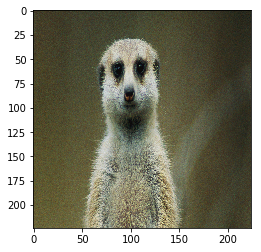

In [43]:
#img = np.random.rand(224,224,3)
#plt.imshow(img)
#plt.show()
#keras.
img_path = path
img = ks_image.load_img(img_path, target_size=(224, 224))
print(type(img))

x = ks_image.img_to_array(img)
print(type(x))
print(x.shape)
plt.imshow(x)
plt.imshow(x/255)

img2 = ks_image.load_img(img_path)
print(type(img2))
#img2.show()

In [4]:
# ADD A DIMENSION
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
#x[np.axis]

In [5]:
%%script false
def random_rotation(x, rg, row_axis=1, col_axis=2, channel_axis=0,
                    fill_mode='nearest', cval=0.):
    """Performs a random rotation of a Numpy image tensor.
    # Arguments
        x: Input tensor. Must be 3D.
        rg: Rotation range, in degrees.
        row_axis: Index of axis for rows in the input tensor.
        col_axis: Index of axis for columns in the input tensor.
        channel_axis: Index of axis for channels in the input tensor.
        fill_mode: Points outside the boundaries of the input
            are filled according to the given mode
            (one of `{'constant', 'nearest', 'reflect', 'wrap'}`).
        cval: Value used for points outside the boundaries
            of the input if `mode='constant'`.
    # Returns
        Rotated Numpy image tensor.
    """
    theta = np.deg2rad(np.random.uniform(-rg, rg))
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                                [np.sin(theta), np.cos(theta), 0],
                                [0, 0, 1]])

    h, w = x.shape[row_axis], x.shape[col_axis]
    transform_matrix = transform_matrix_offset_center(rotation_matrix, h, w)
    x = apply_transform(x, transform_matrix, channel_axis, fill_mode, cval)
    return x
random_rotation(x, rg=40)

In [36]:
datagen1 = ks_image.ImageDataGenerator(
            rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [37]:
datagen2 = ks_image.ImageDataGenerator(
            rotation_range=40,
)

In [38]:
#datagen = ks_image.ImageDataGenerator(zca_whitening=True,)

In [41]:
this_get = datagen1
this_get.fit(x)
#img_gen_iterator = this_get.flow(x,batch_size=1,save_to_dir='/home/batman/Pictures/NewImages', save_prefix='cat', save_format='jpeg')
img_gen_iterator = this_get.flow(x,batch_size=1,)

these_images = list()

i = 0
for res in img_gen_iterator:
    i = i + 1
    these_images.append(res[0])

    if i == 9:
        break
print(len(these_images))


9


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4634b4dd8>


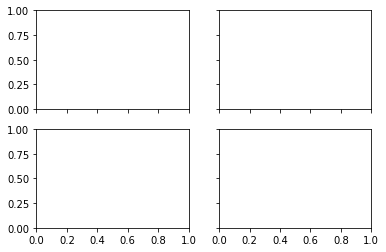

In [61]:
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f, axes = plt.subplots(2, 2, sharex='col', sharey='row')
#print(f)
print(axes)
#all_axes = [ax for ax in axes]


In [60]:
print(all_axes)

[array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4740f9ba8>,
      dtype=object), array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd46345c908>,
      dtype=object)]


In [50]:

for j in range(0, 9):
    print(j, these_images[j].shape)
    #plt.subplot(330 + 1 + j)
    this_sub = plt.subplot(j)
    #plt.subplot(j)
    #plt.imshow(res[j].reshape(28, 28))
    
    plt.imshow(255-these_images[j])
#show the plot
plt.show()

0 (224, 224, 3)


ValueError: Integer subplot specification must be a three-digit number, not 0

In [ ]:
new = res[0]
print(new)
plt.imshow(res[0]+255)

In [ ]:
#X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
#X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [ ]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [ ]:
for batch in datagen.flow([x], batch_size=1):
    i += 1
    plt.imshow(x)
    #plt.imshow(x/255)
    if i > 20:
        break  # otherwise the generator would loop indefinitely